In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [76]:
data = pd.read_csv("skylab_instagram_datathon_dataset.csv", sep=";")
data.drop(columns=['period', 'calculation_type'], inplace=True)
data['period_end_date'] = pd.to_datetime(data['period_end_date'])
data = data.sort_values(by="period_end_date")

In [77]:
data = data[['period_end_date', 'compset_group',
       'business_entity_doing_business_as_name', 'legal_entity_name',
       'domicile_country_name', 'ultimate_parent_legal_entity_name',
       'primary_exchange_name', 'followers', 'pictures', 'videos', 'comments',
       'likes']].drop_duplicates()
# There are multiple rows with all of the exact same data, but different values for compset
# We drop all duplicate rows to ensure no skewing of statistics towards brands with a lot of different compset values

In [78]:
len(data)
# Data is cut in half by removing duplicate rows due to the compset column

325732

# Extra Statistics

In [66]:
# Static statistics - only taking into account the time right now
data['likes_per_picture'] = data['likes'] / data['pictures']
data['likes_per_follower'] = data['likes'] / data['followers']
data['likes_per_post'] = data['likes'] / (data['videos'] + data['pictures'])
data['comments_per_post'] = data['comments'] / (data['videos'] + data['pictures'])

In [67]:
# Moving statistics - take into account difference from trends
# ideas: decay the above statistics, then difference them from the sector / all brands trend
# look at double derivative: likes per week per week 

In [68]:
statistics = ["followers", "pictures", "videos", "comments", "likes", "likes_per_picture", 
              "likes_per_follower", "likes_per_post", "comments_per_post"]

# Sector Trends

## Sector statistics

In [16]:
data[statistics].median()

followers             943314.000000
pictures                  46.000000
videos                     8.000000
comments                1362.000000
likes                  70553.500000
likes_per_picture       1236.657487
likes_per_follower         0.108222
likes_per_post           994.601527
comments_per_post         21.762025
dtype: float64

In [22]:
data.groupby(by="compset_group")[statistics].median()

,followers,pictures,videos,comments,likes,likes_per_picture,likes_per_follower,likes_per_post,comments_per_post
compset_group,,,,,,,,,
Apparel Retail,1.267389e+06,58.0,6.0,1607.0,119919.0,1876.417355,0.120583,1610.201099,22.506849
Beauty & Boutique,1.541229e+06,65.0,14.0,3270.0,124687.0,1099.692394,0.112723,831.521995,26.601975
Beverages,3.969250e+05,26.0,10.0,656.0,16912.0,655.784341,0.056764,428.491697,17.370182
Building Products,2.784150e+04,14.0,4.0,51.0,1373.0,118.564495,0.083953,94.578568,3.000000
Dermatology and Orthodontics,4.681580e+05,33.0,9.0,287.0,3547.0,132.573770,0.019938,88.000000,5.428571
Discount Retailers,6.154925e+05,24.0,6.0,1643.0,88565.0,3041.130435,0.067930,2336.648148,47.480000
Entertainment,3.534970e+07,268.0,174.0,109111.0,15919973.0,110067.429864,0.385013,61280.558049,320.026316
Fitness & Exercise,3.156455e+05,42.0,10.0,802.0,21524.5,533.132365,0.100280,422.349206,14.571429
Food Products,1.016790e+05,15.0,3.0,316.0,5428.0,353.022727,0.066711,268.304054,17.230769


As we can see, entertainment, food and fashion are particularly prominant.

# Stock Data

We have manually collected the returns of stocks for 20 of the top brands of social media. We now want to analyse how the growth in social media relates to this stock growth (or how it doesn't).

We know that for individual stocks there is a lot of noise in trying to find signals that predict stock price (example of this shown in the EDA file) so by looking at all the companies we hope to find a more significant pattern (or lack of one).

The question is: what metrics do we use to measure "social media performance"?
This is completely arbitrary, but some intuitive metrics we came up with were:
* Follower growth
* Average number of weekly likes
* Weekly likes growth
* Engagement growth
    * Likes per post growth
    * Likes per follower growth

We decided on using the growth in followers and the growth in likes per week to compare companies social media growth. However we could use any range / combination of the above, if given more time

## Reading in stock data

In [79]:
stock_data = pd.read_csv("stock_growth_rate_top20.csv",delimiter=";")

In [80]:
stocks = stock_data['business_entity_doing_business_as_name'].to_numpy()

In [86]:
data['year'] = data['period_end_date'].dt.year

## 5 Year Follower Growth

In [145]:
stock_data['follower_growth_5_yr'] = pd.Series()
i = 0

for stock in stocks:
    followers_2023 = data[lambda x: x['business_entity_doing_business_as_name'] == stock].groupby(by='year')['followers'].mean().to_numpy()[-1]
    followers_2019 = data[lambda x: x['business_entity_doing_business_as_name'] == stock].groupby(by='year')['followers'].mean().to_numpy()[-5]
    follower_growth = (followers_2023 - followers_2019) / followers_2019
    stock_data.at[i,"follower_growth_5_yr"] = follower_growth
    i+=1
    #print(f"{stock} follower growth = {follower_growth}")

stock_data['follower_growth_5_yr'] = pd.to_numeric(stock_data['follower_growth_5_yr']) *100

In [146]:
stock_data['follower_growth_5_yr_above_mean'] = stock_data['follower_growth_5_yr'] - stock_data['follower_growth_5_yr'].mean()

Now we can generate a scatter plot

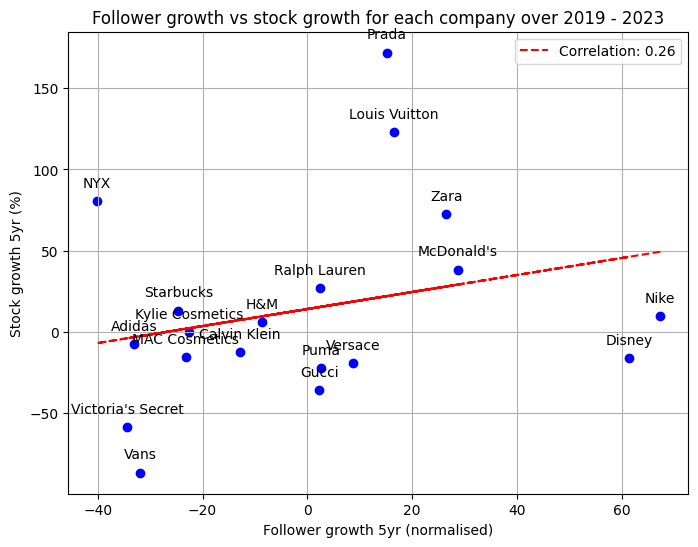

0.2617756987109537


In [147]:
x_axis = 'follower_growth_5_yr_above_mean'
y_axis = 'growth_rate_five_year'

plt.figure(figsize=(8, 6))
plt.scatter(stock_data[x_axis], stock_data[y_axis], color='blue')

# Add labels to points
for i, label in enumerate(stock_data['business_entity_doing_business_as_name']):
    plt.annotate(label, (stock_data[x_axis].iloc[i], stock_data[y_axis].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

correlation_coefficient = stock_data[x_axis].corr(stock_data[y_axis])
plt.plot(stock_data[x_axis], np.poly1d(np.polyfit(stock_data[x_axis], stock_data[y_axis], 1))(stock_data[x_axis]), color='red', linestyle='--', label=f'Correlation: {correlation_coefficient:.2f}')

# Add labels and title
plt.xlabel('Follower growth 5yr (normalised %)')
plt.ylabel('Stock growth 5yr (%)')
plt.title('Follower growth vs stock growth for each company over 2019 - 2023')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

print(stock_data[x_axis].corr(stock_data[y_axis]))

## 5 Year Like Growth

Same thing but for the growth in likes

In [152]:
stock_data['likes_growth_5_yr'] = pd.Series()
i = 0

for stock in stocks:
    likes_2023 = data[lambda x: x['business_entity_doing_business_as_name'] == stock].groupby(by='year')['likes'].mean().to_numpy()[-1]
    likes_2019 = data[lambda x: x['business_entity_doing_business_as_name'] == stock].groupby(by='year')['likes'].mean().to_numpy()[-5]
    likes_growth = (likes_2023 - likes_2019) / likes_2019
    stock_data.at[i,"likes_growth_5_yr"] = likes_growth
    i+=1
    #print(f"{stock} follower growth = {follower_growth}")

stock_data['likes_growth_5_yr'] = pd.to_numeric(stock_data['likes_growth_5_yr']) *100
stock_data['likes_growth_5_yr_above_mean'] = stock_data['likes_growth_5_yr'] - stock_data['likes_growth_5_yr'].mean()

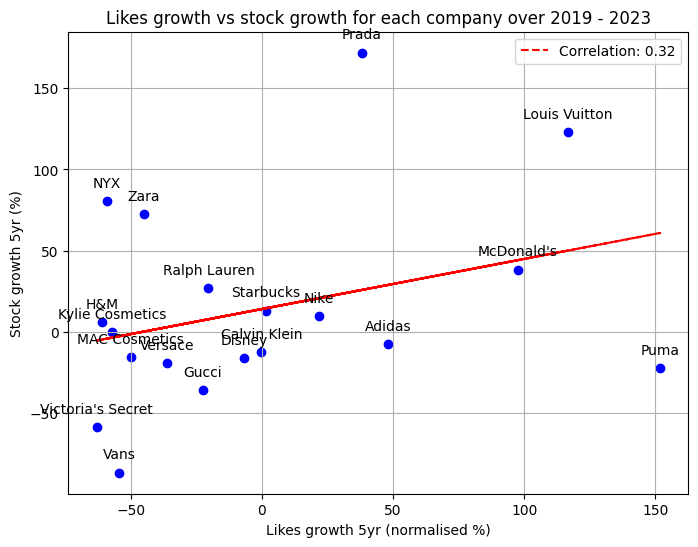

0.3207391320988724


In [157]:
x_axis = 'likes_growth_5_yr_above_mean'
y_axis = 'growth_rate_five_year'

plt.figure(figsize=(8, 6))
plt.scatter(stock_data[x_axis], stock_data[y_axis], color='blue')

# Add labels to points
for i, label in enumerate(stock_data['business_entity_doing_business_as_name']):
    plt.annotate(label, (stock_data[x_axis].iloc[i], stock_data[y_axis].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

correlation_coefficient = stock_data[x_axis].corr(stock_data[y_axis])
plt.plot(stock_data[x_axis], np.poly1d(np.polyfit(stock_data[x_axis], stock_data[y_axis], 1))(stock_data[x_axis]), color='red', linestyle='--', label=f'Correlation: {correlation_coefficient:.2f}')

# Add labels and title
plt.xlabel('Likes growth 5yr (normalised %)')
plt.ylabel('Stock growth 5yr (%)')
plt.title('Likes growth vs stock growth for each company over 2019 - 2023')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

print(stock_data[x_axis].corr(stock_data[y_axis]))